<a href="https://colab.research.google.com/github/danielsneala/Examples_of_Work/blob/main/DSBA_Project_ET_EasyVisa_Fullcode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EasyVisa Project

## Context:

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

## Objective:

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired your firm EasyVisa for data-driven solutions. You as a data scientist have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status. 


## Data Description

The data contains the different attributes of the employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No 
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment. 
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

## Importing necessary libraries and data

In [ ]:
# Library to suppress warnings or deprecation notes 
import warnings
warnings.filterwarnings('ignore')

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Library to split data 
from sklearn.model_selection import train_test_split

# Libraries to import decision tree classifier and different ensemble classifiers
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Libraries to tune model, get different metric scores
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score,f1_score,roc_auc_score
from sklearn.model_selection import GridSearchCV

# We import the package that allows us to use the AdaBoostClassifier and GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

# We import the XGBClassifer pacakge.
from xgboost import XGBClassifier


from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier

## Data Overview

- Observations
- Sanity checks

In [ ]:
# We load the data provided by OLFC
data = pd.read_csv("EasyVisa.csv")

# copying data and name it 'df1' to avoid any changes to original data
df1 = data.copy()

# We look at the shape of the df1 dataset, which comes out to be 25480 rows
# and 12 columns.
df1.shape

(25480, 12)

In [ ]:
# We look at the first 5 rows of the dataset. 
df1.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


From this we see that the first four of five rows are from Asia, with 3 cases in the west region. We also see that 4 of the cases have their previaling_wage in terms of yearly and all of these cases are full-time employed.This makes sense as we're talking about taking in foriegners to work in the USA. Interestingly, we see that 3 of these five cases were denied, which we're going analyze further later on. 

In [ ]:
# We look at the statistical summary of the 'df1' data set.
df1.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
case_id,25480,25480,EZYV01,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
continent,25480,6,Asia,16861,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education_of_employee,25480,4,Bachelor's,10234,NaN,NaN,NaN,NaN,NaN,NaN,NaN
has_job_experience,25480,2,Y,14802,NaN,NaN,NaN,NaN,NaN,NaN,NaN
requires_job_training,25480,2,N,22525,NaN,NaN,NaN,NaN,NaN,NaN,NaN
no_of_employees,25480.0,NaN,NaN,NaN,5667.04321,22877.928848,-26.0,1022.0,2109.0,3504.0,602069.0
yr_of_estab,25480.0,NaN,NaN,NaN,1979.409929,42.366929,1800.0,1976.0,1997.0,2005.0,2016.0
region_of_employment,25480,5,Northeast,7195,NaN,NaN,NaN,NaN,NaN,NaN,NaN
prevailing_wage,25480.0,NaN,NaN,NaN,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27
unit_of_wage,25480,4,Year,22962,NaN,NaN,NaN,NaN,NaN,NaN,NaN


One of the first things that stick out is the fact that only 3 of the 12 columns has an actual mean. This is probably due to the data type in the other columns but we need to confirm that by another method. We also see that the average number of people employed by these companies is 5667 and that many of them were established in 1979. We also see that the average wage is 74455.81 with the range being from 2.14 to 319210.27. 

In [ ]:
# We look at the data types of each columns. 
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


From this, we see that the 9 of the columns contain object type of data while 2 columns have integers, and 1 column has float type of data. Considering that we have 25480 rows in total, its something of a relief to see that we have 25480 non-null values in all the columns. However, we'll need to check further when we clean the data. 

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

In [ ]:
# This function named 'histogram_boxplot' creates a boxplot and a histogram together, so we can 
# better observe the disribution of variables and better answer the above questions.

def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):

    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram 


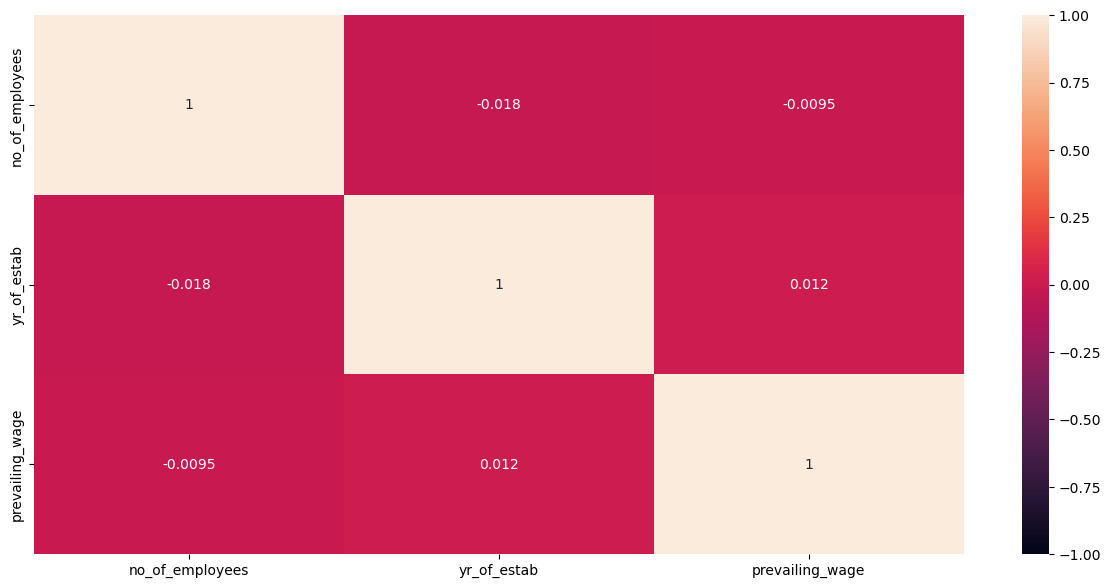

In [ ]:
# We now move into making bivariate analysis, in looking to see if a variable correlates with another variable.

# We specify the size of the graph we're about to make
plt.figure(figsize=(15, 7))
# We make a heatmap graph of the df1 dataset, with annotations. We expand the correlation to be -1 and 1 so we can see
# positive and negative correlations.
sns.heatmap(df1.corr(), annot=True, vmin=-1, vmax=1)
# Displays the graph with no coding messages. 
plt.show()

**Leading Questions**:
1. Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification? 

2. How does the visa status vary across different continents? 
 
3. Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status? 
 
4. In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa? 
 
5. The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?

case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192
------------------------------------------------------------------------------------------------------------------------


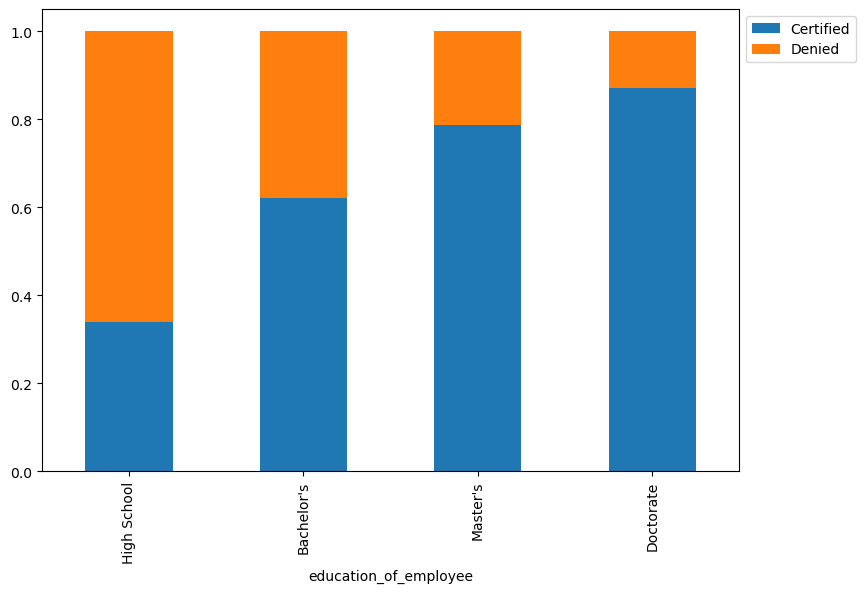

In [ ]:
# We create a function that is called 'stacked_barplot', that takes in the 
# the data, a predictor variable, and a target variable. The target variable in 
# our case will be about whether someone cancelled their booking or not. 
def stacked_barplot(data, predictor, target):
 
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 6))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

# We use the stacked_barplot() function to look at   
# 'education_of_employee' with 'case_status' as the target variable.
stacked_barplot(df1, 'education_of_employee', 'case_status')
# Shows the graph with no coding messages.
plt.show()

From this graph, we see that people that just graded high school and trying to receive approval to certificates to work in the United States are frequently denied. We also see that individuals with Bachelor degrees are twice as likely to receive approval for labor temporary and permanent certificates. Those with a Master's degree are slightly higher, while those who have PhD have the highest likelihood of permitted to work aboard. 



case_status    Certified  Denied    All
continent                              
All                17018    8462  25480
Asia               11012    5849  16861
North America       2037    1255   3292
Europe              2957     775   3732
South America        493     359    852
Africa               397     154    551
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


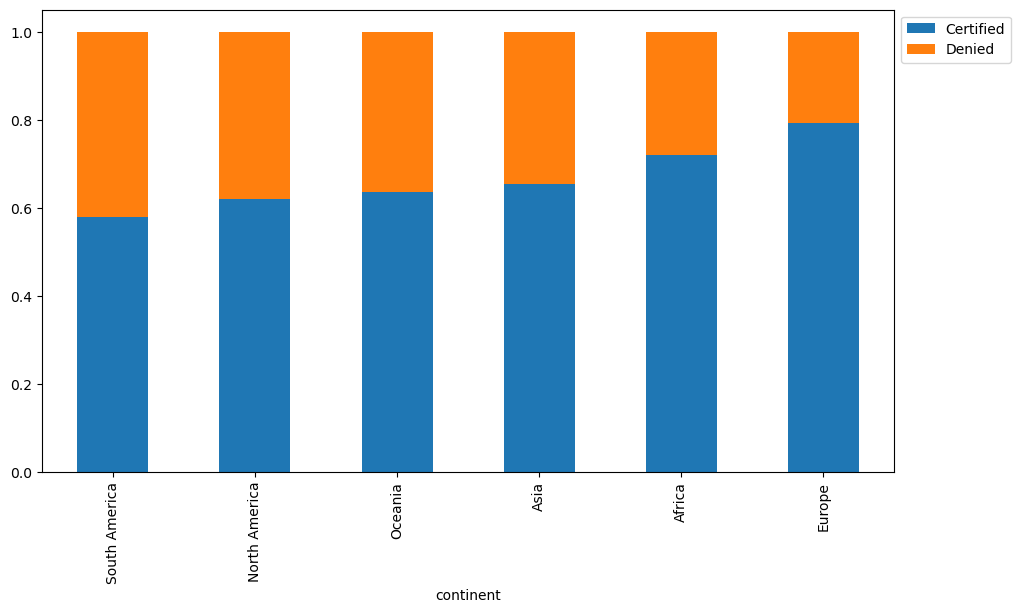

In [ ]:
# We use the stacked_barplot() function to look at
# 'continent' with 'case_status' as the target variable.
stacked_barplot(df1, 'continent', 'case_status')
# Shows the graph with no coding messages.
plt.show()

We see that Europe has the highest certified proportion of foriegn workers, with Africa in second. We also see that Asia is the third highest proportion, with Oceania and North America (possibly referring to Canada) are relatively close in proportion of workers allowed to labor abroad. The lowest proportion of foriegn workers permitted to work in the United States are those from South America but its still higher than 50%. 

case_status         Certified  Denied    All
has_job_experience                          
All                     17018    8462  25480
N                        5994    4684  10678
Y                       11024    3778  14802
------------------------------------------------------------------------------------------------------------------------


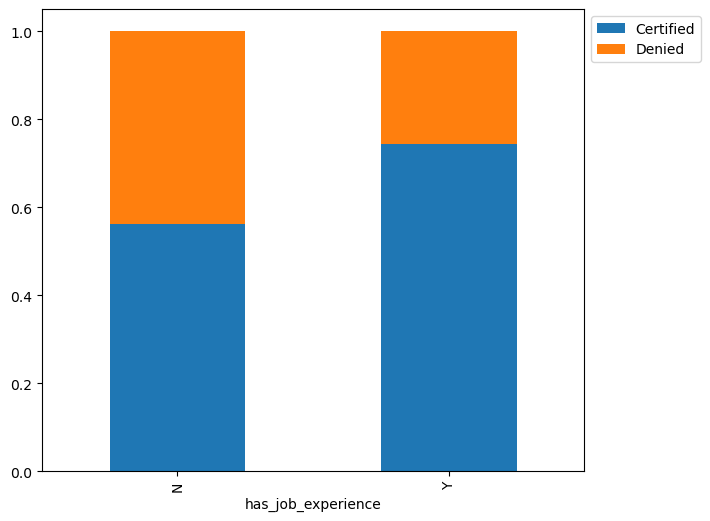

In [ ]:
# We use the stacked_barplot() function to look at   
# 'has_job_experience' with 'case_status' as the target variable.
stacked_barplot(df1, 'has_job_experience', 'case_status')
# Shows the graph with no coding messages.
plt.show()

From this, we see that those who have job experience have roughly 70% probability of being certified. On the other hand, those who don't have job experience have less than 60% chance of being certified.  

case_status   Certified  Denied    All
unit_of_wage                          
All               17018    8462  25480
Year              16047    6915  22962
Hour                747    1410   2157
Week                169     103    272
Month                55      34     89
------------------------------------------------------------------------------------------------------------------------


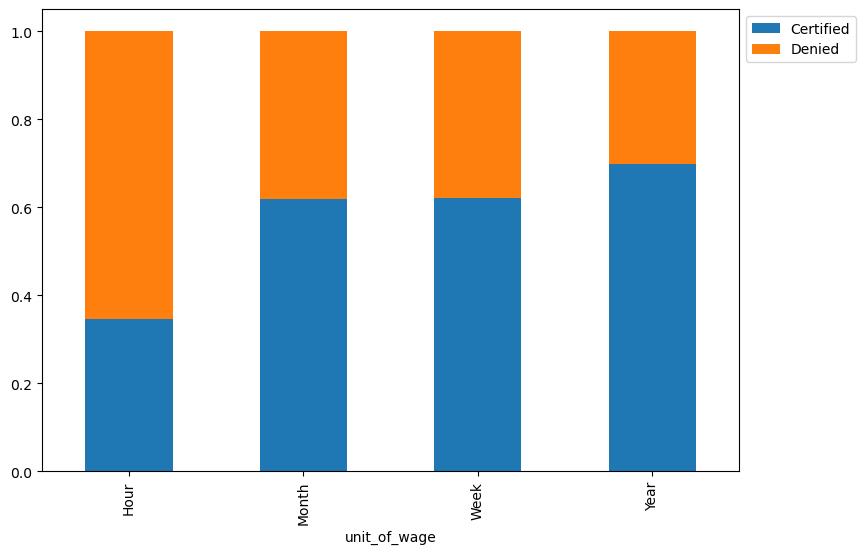

In [ ]:
# We use the stacked_barplot() function to look at
# 'unit_of_wage' with 'case_status' as the target variable.
stacked_barplot(df1, 'unit_of_wage', 'case_status')
# Shows the graph with no coding messages.
plt.show()

We see that less than 40% of the proportion of those who work on an hourly basis are permitted labor certificates. We also see that those who are paid on a monthly and weekly basis have a higher proportion (roughly 60%) that are approved for labor permits. As for those who are paid on a yearly basis, they have a slightly higher proportion of being certified, but only slightly (roughly a 10% increase).  

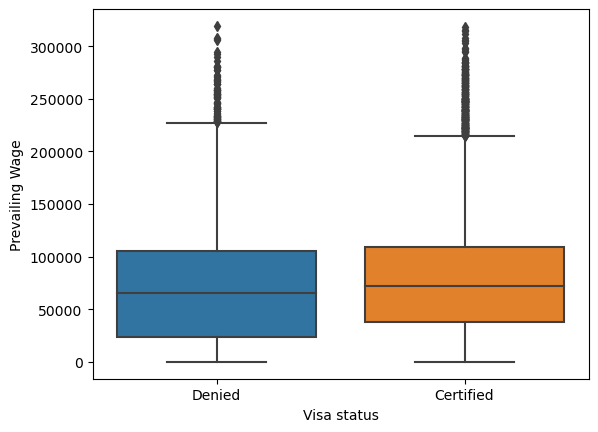

In [ ]:
# We make a boxplot graph, with
# 'case_status' on the x-axis adn 'prevailing_wage' the y-axis.
sns.boxplot(df1, x ='case_status', y = 'prevailing_wage')
# We label the x-axis "Visa status".
plt.xlabel('Visa status')
# We label the y-axis "Prevailing Wage"
plt.ylabel('Prevailing Wage')
# Shows the graph with no coding messages.
plt.show()

From this, we see that the mean and the interquartile range is slightly higher for those who are certified to work in the United States. This means that those who are permitted to work in the United States have a higher prevailing wage. However, we also should take into account that both categories have outliers, which will prove to be helpful in the next section. 

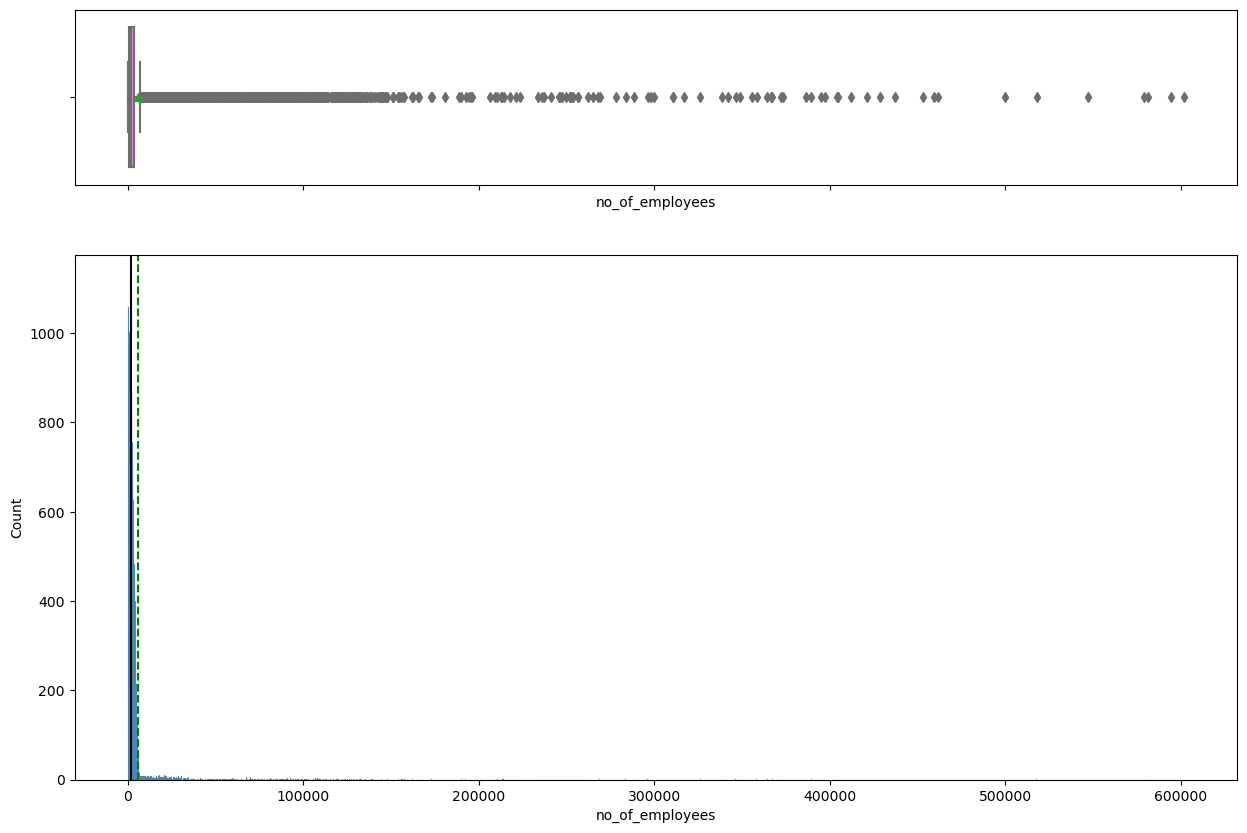

In [ ]:
# We use the histrogram and boxplot function to take a look ath the 
# 'no_of_employees' column to see if it contains outliers, which we see it does. 
histogram_boxplot(df1, 'no_of_employees')

We have it that the data of the 'no_of_employees' is severely left-skewed and tends to have mean that is severely less than 100000. This may be because large corporations can provide a larger porportion of jobs to foreign workers than their counterparts. However, this will severely influence our data as there's so many outliers.   

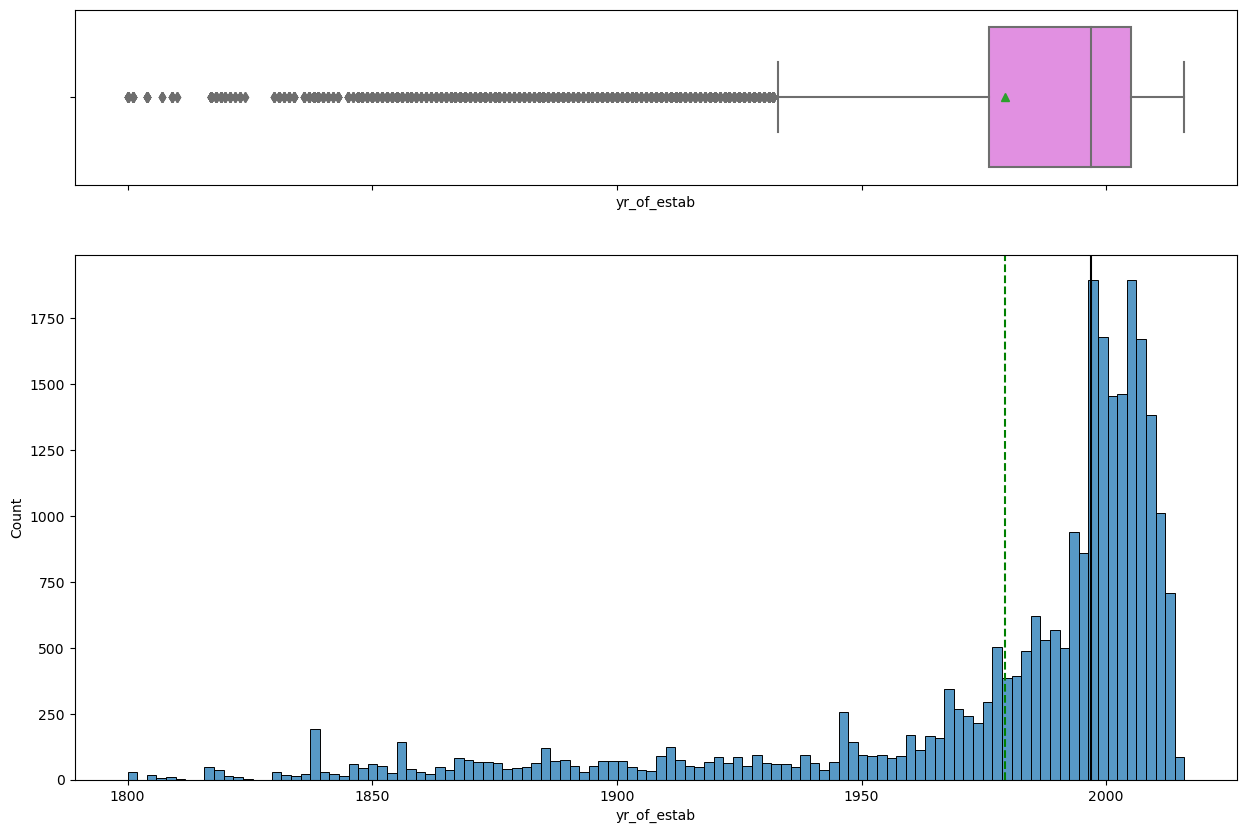

In [ ]:
# We use the histogram_boxplot() function created earlier, to look at the 'yr_of_estab' column 
histogram_boxplot(df1, 'yr_of_estab')

In this column of 'yr_of_estab', we see that few were established in 1800, while the Interquartile range tends to be approximately 1930 to max value (which may be 2000, based on graph trends). Logically, this can make sense as companies established later than 1930 may have sprung up during the technology revolution and quickly adapted. However we also see outliers in this column, which we will need to clean.  

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering 
- Outlier detection and treatment (if needed)
- Preparing data for modeling 
- Any other preprocessing steps (if needed)

In [ ]:
# We take a look at how many missing values are present in each column.
# The first thing that stands out is that a large majority of missing values
# are present in the 'main_camera_mp' column.
df1.isnull().sum() 

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

In [ ]:
# We make a subset named 'df2' where we drop cases where the value is missing. 
df2 = df1.dropna()

# We look at the shape of the cleaned dataset and see that we still have 
# 25480 rows and 12 columns. 
df2.shape

(25480, 12)

In [ ]:
# We create a function named 'treat_outliers' to help us remove outliers. 
def treat_outliers(df, col):
    """
    treats outliers in a variable
    col: str, name of the numerical variable
    df: dataframe
    col: name of the column
    """
    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1                # Inter Quantile Range (75th perentile - 25th percentile)
    lower_whisker = Q1 - 1.5 * IQR
    upper_whisker = Q3 + 1.5 * IQR

    # all the values smaller than lower_whisker will be assigned the value of lower_whisker
    # all the values greater than upper_whisker will be assigned the value of upper_whisker
    # the assignment will be done by using the clip function of NumPy
    df[col] = np.clip(df[col], lower_whisker, upper_whisker)

    return df


# We create a dataset named 'df3' which takes the 'df2' dataset in the treat_outliers function to treat 
# the 'prevailing_wage' column.
df3 = treat_outliers(df2, 'prevailing_wage')

# We create a dataset named 'df4' which takes the 'df3' dataset in the treat_outliers function to treat 
# the 'no_of_employees' column.
df4 = treat_outliers(df3, 'no_of_employees')

# We create a dataset named 'df5' which takes the 'df4' dataset in the treat_outliers function to treat 
# the 'yr_of_estab' column.
df5 = treat_outliers(df4, 'yr_of_estab')

# We drop the 'case_id' column as we're not looking at any mathematical
# models based on that column. 
df6 = df5.drop(['case_id'], axis = 1)

# Next we look at the number unique values in 'continent' column.
print(df6.continent.value_counts())

# Next we look at the number unique values in 'education_of_employees' column.
print(df6.education_of_employee.value_counts())

# Next we look at the number unique values in 'has_job_experience' column.
print(df6.has_job_experience.value_counts())

# Next we look at the number unique values in 'training' column.
print(df6.requires_job_training.value_counts())

# Next we look at the number unique values in 'region_of_employment' column.
print(df6.region_of_employment.value_counts())

# Next we look at the number unique values in 'unit_of_wage' column.
print(df6.unit_of_wage.value_counts())

# Next we look at the number unique values in 'full_time_position' column.
print(df6.full_time_position.value_counts())

# Next we look at the number unique values in 'case_status' column.
print(df6.case_status.value_counts())

Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: continent, dtype: int64
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: education_of_employee, dtype: int64
Y    14802
N    10678
Name: has_job_experience, dtype: int64
N    22525
Y     2955
Name: requires_job_training, dtype: int64
Northeast    7195
South        7017
West         6586
Midwest      4307
Island        375
Name: region_of_employment, dtype: int64
Year     22962
Hour      2157
Week       272
Month       89
Name: unit_of_wage, dtype: int64
Y    22773
N     2707
Name: full_time_position, dtype: int64
Certified    17018
Denied        8462
Name: case_status, dtype: int64


In [ ]:
# Seeing what we know, we then restructure the categorical columns to
# instead have numeric values instead. 

# We create a dataset that replaces certain column values with numeric values.

replaceStruct = {
    # We order continent by how close they are relative to the United States of America
    "continent": {"Asia": 6, "Europe": 4, "North America": 1, "South America": 2, 
                  "Africa": 5, "Oceania": 3},
    # We order the education of the employee by the level of education.
    "education_of_employee": {"Bachelor's": 2, "Master's": 3,  "High School": 1,
                              "Doctorate": 4},
    # We have 'has_job_experience' column set into binary values.
    "has_job_experience": {"Y": 1, "N": 0},
    # We have 'requires_job_training' become binary values
    "requires_job_training": {"Y": 1, "N": 0},
    # We order the 'region_of_employment' into numerical values but we don't know what these values mean.
    # I decided to go from remote to more likely populated.
    "region_of_employment": {"Northeast": 2, "South": 3, "West":4, "Midwest":5,
                            "Island": 1},
    # We have the 'unit_of_wage' be converted into numeric values, organized by time period.
    "unit_of_wage": {"Hour": 1, "Week": 2, "Month": 3, "Year": 4},
    # We have 'full_time_position' become binary values
    "full_time_position": {"Y":1, "N":0},
    # We have 'case_status' column become binary values.
    "case_status": {"Certified": 1, "Denied": 0}

}

# We make a df7 dataset, where we replace the categorical values with numerical values we specified.
df7 = df6.replace(replaceStruct)

## EDA

- It is a good idea to explore the data once again after manipulating it.

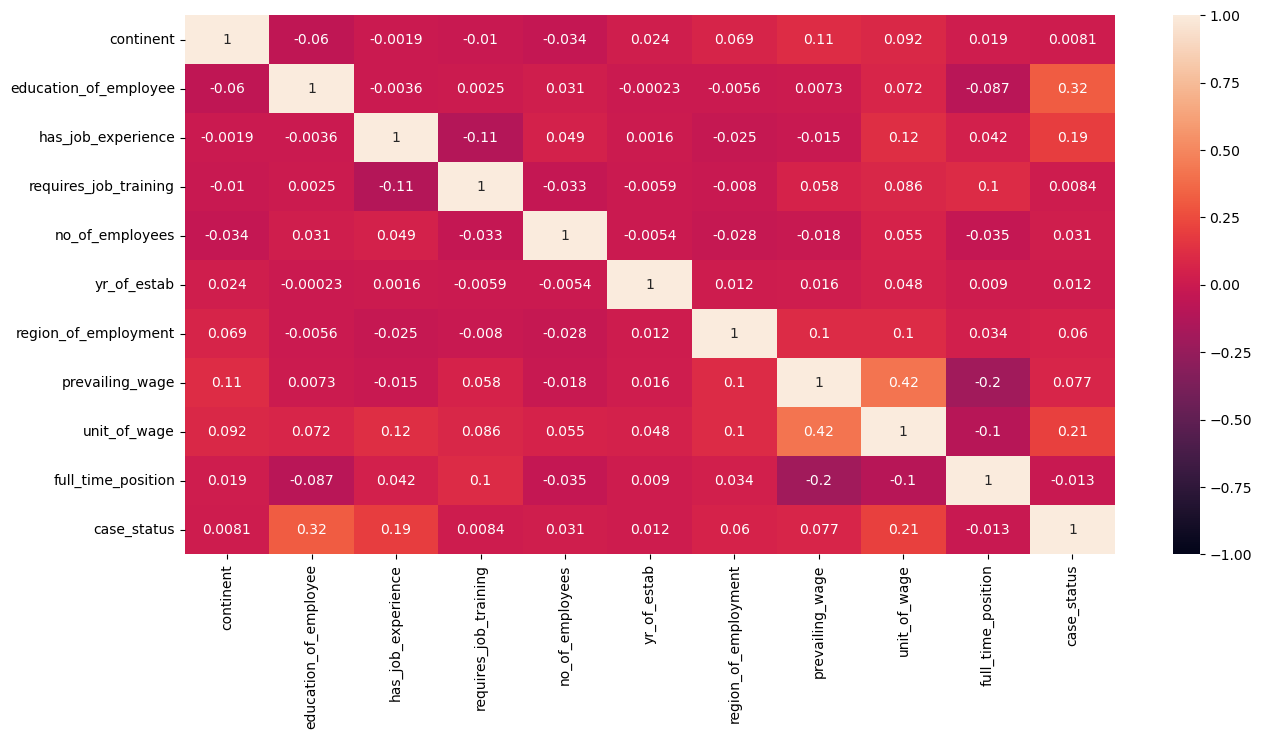

In [ ]:
# We specify the size of the graph we're about to make
plt.figure(figsize=(15, 7))
# We make a heatmap graph of the df1 dataset, with annotations. We expand the correlation to be -1 and 1 so we can see
# positive and negative correlations.
sns.heatmap(df7.corr(), annot=True, vmin=-1, vmax=1)
# Displays the graph with no coding messages. 
plt.show()

From this graph, we see that there is a strong degative correlation between prevailing_wage and full_time_position. We also see that the unit_of_wage has a high correlation with previaling wage and roughly 32% of those certified has correlation with their education. We also see that job experience and the unit of wage has high correlation with being certified. On the other hand, we see that if a person has job experience and the position also requires job training, there is a negative relationship.

case_status               0      1    All
education_of_employee                    
All                    8462  17018  25480
2                      3867   6367  10234
1                      2256   1164   3420
3                      2059   7575   9634
4                       280   1912   2192
------------------------------------------------------------------------------------------------------------------------


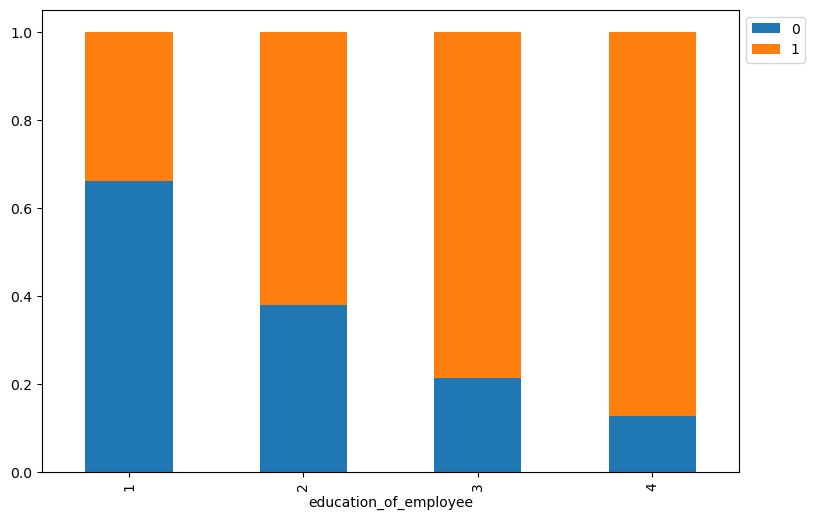

In [ ]:
# We use the stacked_barplot() function to look at   
# 'education_of_employee' with 'case_status' as the target variable.
stacked_barplot(df7, 'education_of_employee', 'case_status')
# Shows the graph with no coding messages.
plt.show()

We see that in this chart that our modified data still shows as we increase in education (1 being a high school's education and 4 being a Doctorate) there's a higher proportion of being certified. We also see that more than 60% of individuals with a high school education are denied while less than 20% of Doctorates are denied visas. Obtaining a bachelor's degree decreases the probability of being denied by roughly 30%.

case_status     0      1    All
continent                      
All          8462  17018  25480
6            5849  11012  16861
1            1255   2037   3292
4             775   2957   3732
2             359    493    852
5             154    397    551
3              70    122    192
------------------------------------------------------------------------------------------------------------------------


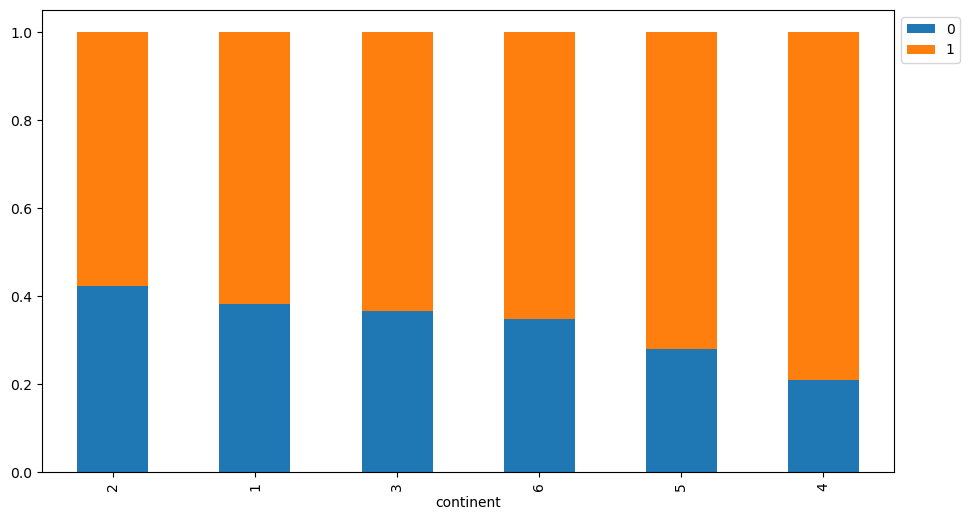

In [ ]:
# We use the stacked_barplot() function to look at
# 'continent' with 'case_status' as the target variable.
stacked_barplot(df7, 'continent', 'case_status')
# Shows the graph with no coding messages.
plt.show()

Now, because we replaced the continent names with numerical values, its admittedly hard to decipher what this graph is telling us. However, when we look at the Restruct code and compare it with the produced graph, we see that those who come from South America are more likely to be denied (40%) than any other group. Next are those who are from the North American continent, Oceania, and Asia (like Canada, Fiji, and Japan respectively). The continent that has the highest rate of being certified to work in the USA are those from Europe. Whether this stems from racial basis cannot be proved by our dataset. 

case_status              0      1    All
region_of_employment                    
All                   8462  17018  25480
2                     2669   4526   7195
4                     2486   4100   6586
3                     2104   4913   7017
5                     1054   3253   4307
1                      149    226    375
------------------------------------------------------------------------------------------------------------------------


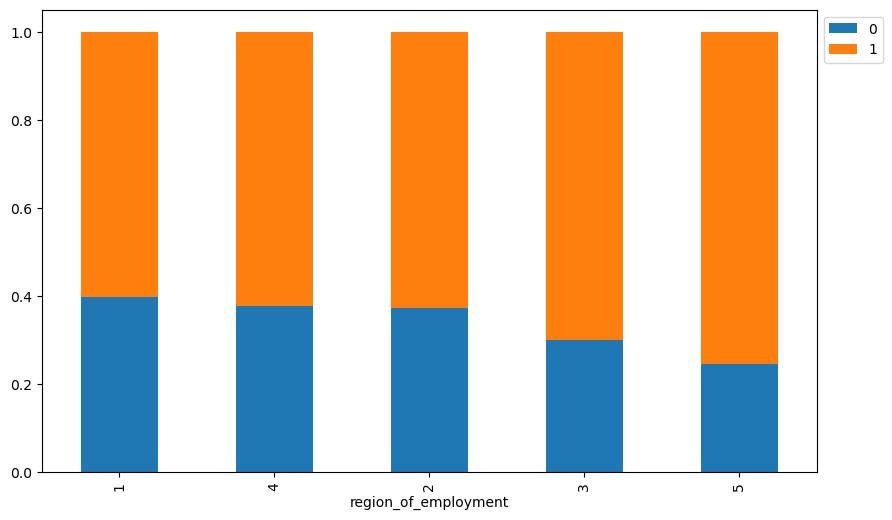

In [ ]:
# We use the stacked_barplot() function to look at
# 'region_of_employment' with 'case_status' as the target variable.
stacked_barplot(df7, 'region_of_employment', 'case_status')
# Shows the graph with no coding messages.
plt.show()

From this graph, we see that those who intend to work on the islands has the lowest rate of being certified than any other region (roughly 60%). On the opposite side, we see that those who decide to reside in the Midwest have higher rate of certification (roughly 70%). Interestingly, we notice that those who decide to take residence in the South has a better chance of being certified than those who want to reside in the West or Northeast regions. 

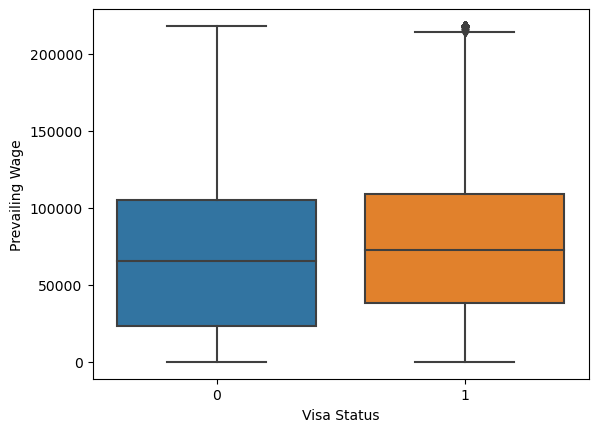

In [ ]:
# We make a boxplot graph, with
# 'case_status' on the x-axis adn 'prevailing_wage' the y-axis.
sns.boxplot(df7, x ='case_status', y = 'prevailing_wage')
# We label the x-axis "Visa Status"
plt.xlabel('Visa Status')
# We label the y-axis "Prevailing Wage"
plt.ylabel('Prevailing Wage')
# Shows the graph with no coding messages.
plt.show()

From this graph, the first thing that we notice is that we have fewer outliers (we still have some for those who receive a certified visa). However, we still notice that the interquartile range that those who were certified is higher than those who are denied. However, it's worthwhile to notice that the range for those who are denied visas has a larger spread. We also see that that the median of those who are certified slightly higher than their compatriots. 

case_status            0      1    All
has_job_experience                    
All                 8462  17018  25480
0                   4684   5994  10678
1                   3778  11024  14802
------------------------------------------------------------------------------------------------------------------------


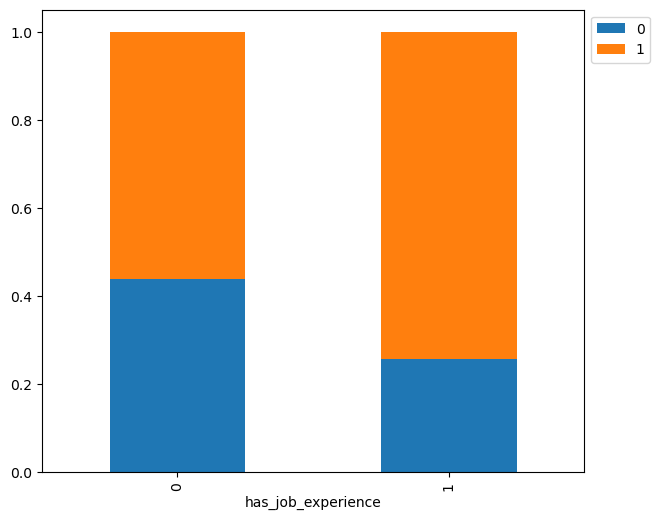

In [ ]:
# We use the stacked_barplot() function to look at   
# 'has_job_experience' with 'case_status' as the target variable.
stacked_barplot(df7, 'has_job_experience', 'case_status')
# Shows the graph with no coding messages.
plt.show()

We have it that those who have have job experience are less likely to be denied visas by approximately 70%. Those who don't have relevant job experience are more than 40% likely to be denied. 

case_status      0      1    All
unit_of_wage                    
All           8462  17018  25480
4             6915  16047  22962
1             1410    747   2157
2              103    169    272
3               34     55     89
------------------------------------------------------------------------------------------------------------------------


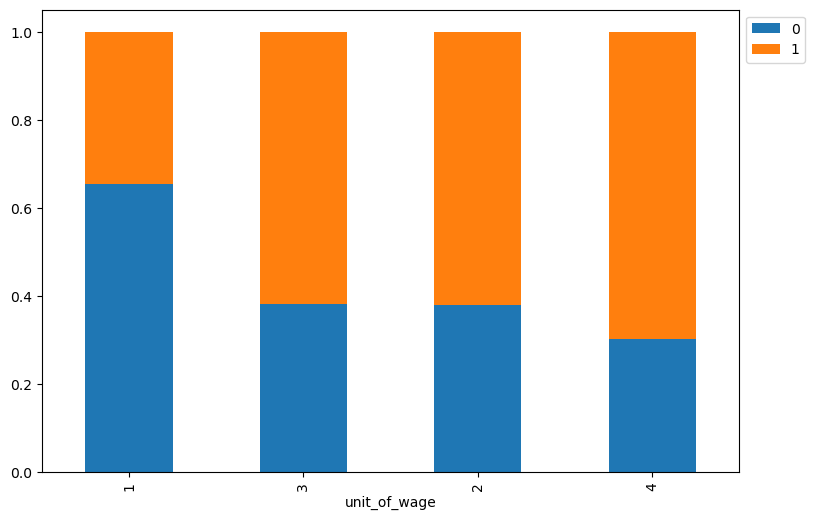

In [ ]:
# We use the stacked_barplot() function to look at
# 'unit_of_wage' with 'case_status' as the target variable.
stacked_barplot(df7, 'unit_of_wage', 'case_status')
# Shows the graph with no coding messages.
plt.show()

We see that if someone is paid on an hourly basis (represented as 1), that they have more than 60% chance of being denied. We also see that those who are paid on a monthly basis are marginally  higher rate of being denied than those who are paid on a weekly basis. Both cases have less than 40% probability of being denied visas. The lowest rate of being denied visas are those who are paid on a yearly basis. 

## Building bagging and boosting models

In [ ]:
#We define a function to compute different metrics to check performance 
#of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

# We make an function called 'confusion_matrix_sklearn' to
# make a confusion matrix with percentages. 
def confusion_matrix_sklearn(model, predictors, target):

    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    


In [ ]:
# We make the 'X' variable to have the df7 dataset, without the 'case_status' column. 
X= df7.drop(['case_status'], axis = 1)
# We make a 'y' variable that holds the 'case_status' column data from the 'df7' dataset. 
y = df7['case_status']

# We split the data into training and test data sets. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1,stratify=y)


At this point, we've established our training and test data sets but we're still not sure what data to use or not. To help us out in seeing which model to use and what it tells us, we create mulitple models (two bagging and three boosting methods) and see what they tell us. 

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Testing performance:
    Accuracy   Recall  Precision        F1
0  0.726714  0.84094   0.770736  0.804309


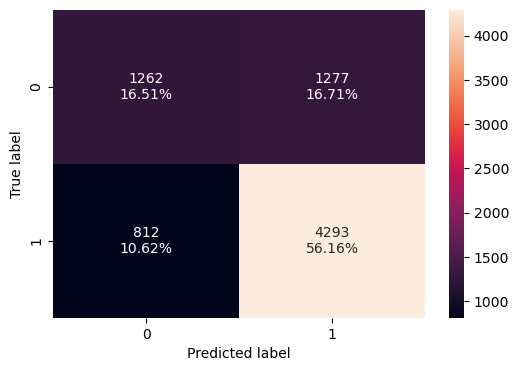

In [ ]:
# We first conduct the Random Forest model. 
rf_estimator = RandomForestClassifier(random_state=1)
# We run the Random Forest model on the X_train and y_train datasets.
rf_estimator.fit(X_train,y_train)

#Calculating different metrics of the Random Forest model.
rf_estimator_model_train_perf=model_performance_classification_sklearn(rf_estimator,X_train,y_train)
print("Training performance:\n",rf_estimator_model_train_perf)
rf_estimator_model_test_perf=model_performance_classification_sklearn(rf_estimator,X_test,y_test)
print("Testing performance:\n",rf_estimator_model_test_perf)

#Create confusion matrix based on the random forest model.
confusion_matrix_sklearn(rf_estimator, X_test, y_test)

From the Random Forest model confusion matrix, we see that roughly 56.27% was predicted to be correctly predicted to be certified while 16.46% was predicted to to not be certified and turned out to be true. However, we need to keep in mind that 16.76% was predicted to be certified but were instead denied visas while 10.52% were predicted to not be certified and yet were.   

Training performance:
    Accuracy    Recall  Precision        F1
0  0.984694  0.985478   0.991554  0.988507
Testing performance:
    Accuracy    Recall  Precision        F1
0   0.69741  0.769246    0.77578  0.772499


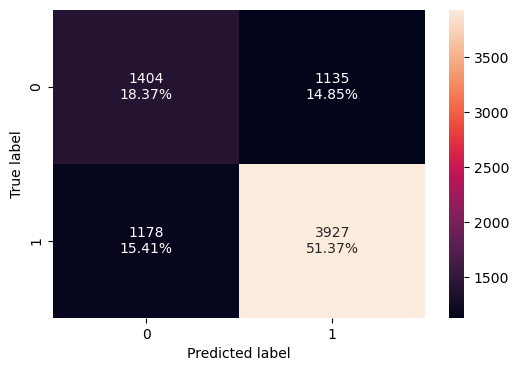

In [ ]:
# Now, we focus on the Bagging Classifier model to see how well it fares.


# We fit a Bagging classifier model on the training dataset. 
bagging_classifier = BaggingClassifier(random_state=1)
# We run the Bagging Classifier model on the X_train and y_train datasets.
bagging_classifier.fit(X_train,y_train)

#Calculating different metrics
bagging_classifier_model_train_perf=model_performance_classification_sklearn(bagging_classifier,X_train,y_train)
print("Training performance:\n",bagging_classifier_model_train_perf)
bagging_classifier_model_test_perf=model_performance_classification_sklearn(bagging_classifier,X_test,y_test)
print("Testing performance:\n",bagging_classifier_model_test_perf)
#Create confusion matrix based on the bagging classifier model.
confusion_matrix_sklearn(bagging_classifier, X_test, y_test)


From this Bagging classifier confusion matrix, we see that only 51.24% were correctly predicted to be certified while 18.11% were correctly predicted to be denied. However, we need to keep in mind that 15.54% were predicted to not be certified but were. We also see that 15.11% were predicted to be certified but were not. 

   Accuracy    Recall  Precision        F1
0  0.738338  0.890624   0.759267  0.819716
   Accuracy    Recall  Precision        F1
0  0.733647  0.885994   0.756734  0.816279


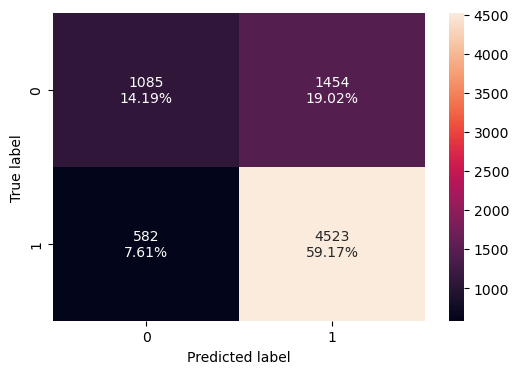

In [ ]:
#Fitting the AdaBoost classifier model
ab_classifier = AdaBoostClassifier(random_state=1)
# We run the AdaBoost model on the X_train and y_train datasets.
ab_classifier.fit(X_train,y_train)

#Calculating different metrics
ab_classifier_model_train_perf=model_performance_classification_sklearn(ab_classifier,X_train,y_train)
print(ab_classifier_model_train_perf)
ab_classifier_model_test_perf=model_performance_classification_sklearn(ab_classifier,X_test,y_test)
print(ab_classifier_model_test_perf)

#Create confusion matrix based on the AdaBoost classifier model.
confusion_matrix_sklearn(ab_classifier,X_test,y_test)

From this, we see that 59.14% were predicted and were certified. We also see that the model correctly predicted that 14.29% would be denied labor visas. However, we need to keep in mind that 18.93% were predicted to be certified but were instead denied. We also have 584 (7.64%) cases where the individuals were predicted to be denied but were certified instead.  

Training performance:
    Accuracy    Recall  Precision        F1
0  0.757401  0.893226   0.776942  0.831036
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.744375  0.885798   0.767351  0.822331


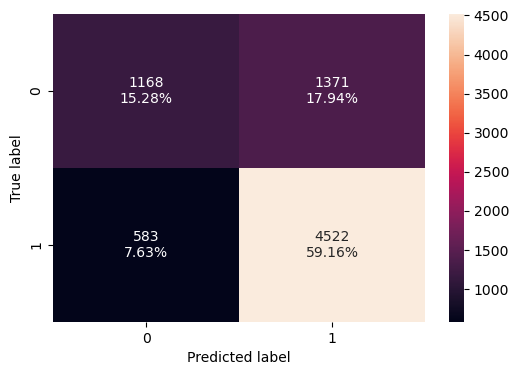

In [ ]:
#Fitting the Gradient Boosting classifier model
gb_classifier = GradientBoostingClassifier(random_state=1)
# We run the Gradient Boosting model on the X_train and y_train datasets.
gb_classifier.fit(X_train,y_train)

#Calculating different metrics
gb_classifier_model_train_perf=model_performance_classification_sklearn(gb_classifier,X_train,y_train)
print("Training performance:\n",gb_classifier_model_train_perf)
gb_classifier_model_test_perf=model_performance_classification_sklearn(gb_classifier,X_test,y_test)
print("Testing performance:\n",gb_classifier_model_test_perf)

#Create confusion matrix based on the Gradient Boosting classifer model.
confusion_matrix_sklearn(gb_classifier,X_test,y_test)

From this Gradient Boosing confusion matrix, we see that only 59.17% were correctly predicted to be certified while 15.33% were correctly predicted to be denied. However, we need to keep in mind that 7.61% were predicted to not be certified but were. We also see that 17.88% were predicted to be certified but were not. 

Training performance:
    Accuracy    Recall  Precision        F1
0  0.847107  0.937967   0.848959  0.891246
Testing performance:
    Accuracy    Recall  Precision        F1
0   0.73247  0.860333   0.767296  0.811155


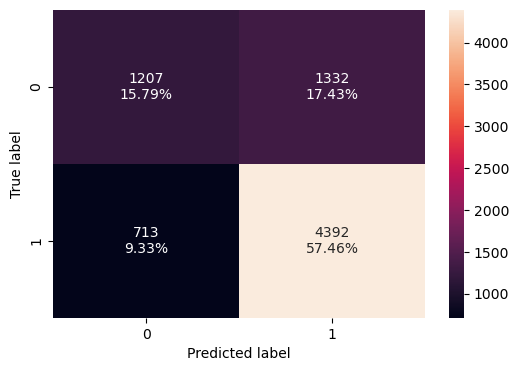

In [ ]:
#Fitting the Boosting classifier model
xgb_classifier = XGBClassifier(random_state=1,eval_metric='logloss')
# We run the XGBoosting model on the X_train and y_train datasets.
xgb_classifier.fit(X_train,y_train)

#Calculating different metrics
xgb_classifier_model_train_perf=model_performance_classification_sklearn(xgb_classifier,X_train,y_train)
print("Training performance:\n",xgb_classifier_model_train_perf)
xgb_classifier_model_test_perf=model_performance_classification_sklearn(xgb_classifier,X_test,y_test)
print("Testing performance:\n",xgb_classifier_model_test_perf)

#Create confusion matrix based on the XGBoosting model.
confusion_matrix_sklearn(xgb_classifier,X_test,y_test)

From this XG Boosting confusion matrix, we see that 57.13% were correctly predicted to be certified while 15.89% were correctly predicted to be denied. However, we need to keep in mind that 9.65% were predicted to not be certified but were. We also see that 17.32% were predicted to be certified but were not. 

##  Will tuning the hyperparameters improve the model performance?

In [ ]:
# We choose the Random Forest model and tune its hyperparameters.   
rf_tuned = RandomForestClassifier(class_weight={0:0.18,1:0.82},random_state=1,oob_score=True,bootstrap=True)

parameters = {  
    # We have the max_depth be set to values between 3 and 10, with the iteration of 3.
                'max_depth': list(np.arange(3,10,3)),
    # We look at the max_features at each split in terms of square root, log,
    # and number of features present. 
                'max_features': ['sqrt','log2',None],
    # We look at the min_sample
                'min_samples_leaf': np.arange(1,10,3),
                'min_samples_split': np.arange(5, 15, 3),
                'n_estimators': np.arange(1,61,10)}


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=scorer, cv=5,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.18, 1: 0.82}, max_depth=9,
                       max_features=None, min_samples_split=5, n_estimators=21,
                       oob_score=True, random_state=1)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.730096  0.998069   0.712787  0.831643
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.698195  0.975906   0.695227  0.811996


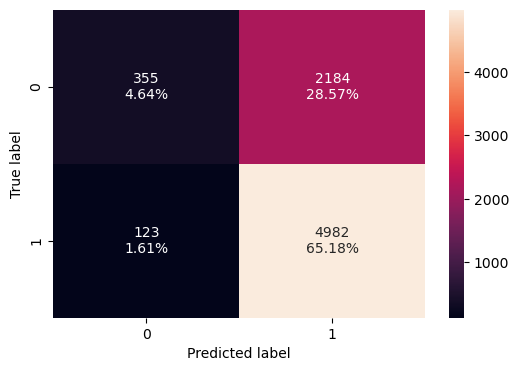

In [ ]:
# Calculating different metrics, using the rf_tuned model looking at the train datasets and store the metrics in
# 'rf_tuned_model_train_perf'
rf_tuned_model_train_perf=model_performance_classification_sklearn(rf_tuned,X_train,y_train)
# We print the values stored in the 'rf_tuned_model_train_perf' variable.
print("Training performance:\n",rf_tuned_model_train_perf)
#Calculating different metrics, using the rf_tuned model looking at the test datasets and store the metrics in
# 'rf_tuned_model_test_perf'
rf_tuned_model_test_perf=model_performance_classification_sklearn(rf_tuned,X_test,y_test)
print("Testing performance:\n",rf_tuned_model_test_perf)

#Create confusion matrix based on the tuned random forest model.
confusion_matrix_sklearn(rf_tuned,X_test,y_test)

We have it 62.56% of the Random Forest model correctly predicted that 62.56% of the training set would be certified and that 9.55% would be denied. However, we need to keep in mind that 4.23% of the training data actually became certified despite predicting otherwise. We also see that 23.67% of the data was  

In [ ]:
# We tune the hyperparameters of the Bagging classifier and name the 
# model as 'bagging_estimator_tuned'
bagging_estimator_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {'max_samples': [0.7,0.8,0.9,1], 
              'max_features': [0.7,0.8,0.9,1],
              'n_estimators' : [10,20,30,40,50],
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train, y_train)

BaggingClassifier(max_features=0.7, max_samples=0.7, n_estimators=50,
                  random_state=1)

   Accuracy    Recall  Precision       F1
0  0.992711  0.999328   0.989856  0.99457
   Accuracy    Recall  Precision        F1
0  0.728022  0.885994   0.751329  0.813124


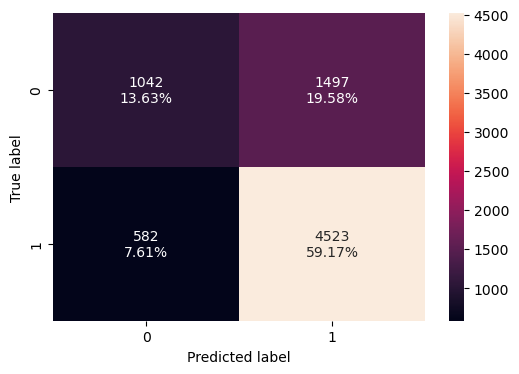

In [ ]:
# Calculating different metrics, using the bagging_estimator_tuned model looking at the train datasets and store the metrics in
# 'bagging_estimator_tuned_model_train_perf'
bagging_estimator_tuned_model_train_perf=model_performance_classification_sklearn(bagging_estimator_tuned,X_train,y_train)
print(bagging_estimator_tuned_model_train_perf)
#Calculating different metrics, using the bagging_estimator_tuned model looking at the test datasets and store the metrics in
# 'bagging_estimator_tuned_model_test_perf'
bagging_estimator_tuned_model_test_perf=model_performance_classification_sklearn(bagging_estimator_tuned,X_test,y_test)
print(bagging_estimator_tuned_model_test_perf)

#Creating confusion matrix based on the bagging_estimator_tuned model. 
confusion_matrix_sklearn(bagging_estimator_tuned,X_test,y_test)

From this confusion matrix of the Bagging method, tuned, we see that the proportion of cases correctly predicted to be certified has increased to 59% and the predicted cases not to be certified has also decreased to 13.17%.  This looks good but we need to keep in mind the proportion of false positives and false negatives. We see that the number of false positives (cases where we predicted certification but weren't) has increased to 20.04% and the false negatives has decreased to 7.78%. We would need to compare the statistics before we come to any solid conclusions at this point. 

In [ ]:
# We make a another AdaBoost model, but with the hyperparameters tuned
# and name it 'abc_tuned'
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    #Let's try different max_depth for base_estimator 
    "base_estimator":[DecisionTreeClassifier(max_depth=1),DecisionTreeClassifier(max_depth=2),
                      DecisionTreeClassifier(max_depth=3)],
     # We have the 'n_estimators' be set to values between 6 and 55, with the iteration of 6.
    "n_estimators": np.arange(6,55,6),
     # We have the learning_rate be set to values between 0.1 and 0.2, with the iteration of 0.1.
    "learning_rate":np.arange(0.1,2,0.1)
}

# Type of scoring used to compare parameter  combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                   learning_rate=0.4, n_estimators=12, random_state=1)

   Accuracy    Recall  Precision        F1
0  0.752859  0.893394   0.772295  0.828442
   Accuracy    Recall  Precision        F1
0  0.741104  0.887561   0.763309  0.820759


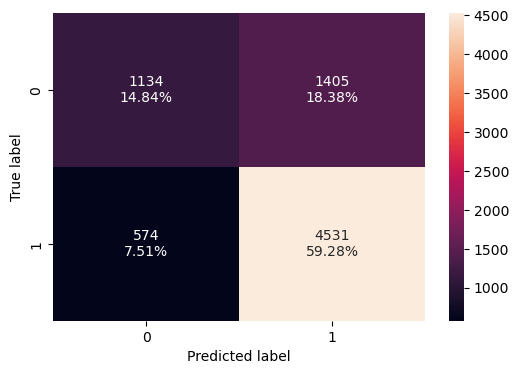

In [ ]:
#Calculating different metrics, using the abc_tuned model looking at the train datasets and store the metrics in
# 'abc_tuned_model_train_perf'
abc_tuned_model_train_perf=model_performance_classification_sklearn(abc_tuned,X_train,y_train)
# We print the results of the 'abc_tuned_model_train_perf' variable.
print(abc_tuned_model_train_perf)
#Calculating different metrics, using the abc_tuned model looking at the test datasets and store the metrics in
# 'abc_tuned_model_test_perf'
abc_tuned_model_test_perf=model_performance_classification_sklearn(abc_tuned,X_test,y_test)
#We print the results of the 'abc_tuned_model_test_perf' variable.
print(abc_tuned_model_test_perf)

#Create confusion matrix based on the tuned AdaBoost model.
confusion_matrix_sklearn(abc_tuned,X_test,y_test)

In this table, we also see see that there's some differences from the untuned AdaBoost model but the surprising thing is that its only marginally in the confusion matrix and also in the metrics. This indicates that the AdaBoost model cannot be improved upon significantly compared to the untuned version. 

In [ ]:
# We make a another Gradient Boost model, but with the hyperparameters tuned
# and name it 'gbc_tuned'
gbc_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [30,75,100,150],
    "subsample":[0.8,0.9,1],
    "max_features":[0.7,0.8,0.9,1]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.9, n_estimators=75, random_state=1,
                           subsample=1)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.755214  0.891799   0.775418  0.829546
Testing performance:
    Accuracy   Recall  Precision        F1
0  0.744636  0.88619    0.76743  0.822545


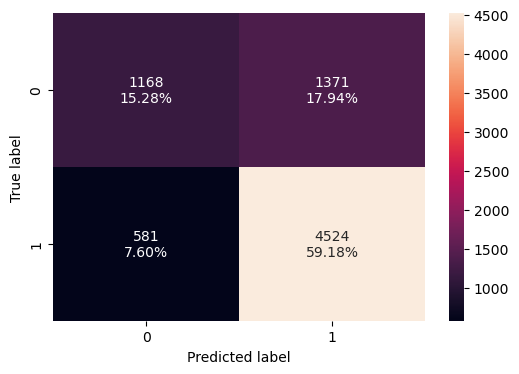

In [ ]:
#Calculating different metrics, using the gbc_tuned model looking at the train datasets and store the metrics in
# 'gbc_tuned_model_train_perf'
gbc_tuned_model_train_perf=model_performance_classification_sklearn(gbc_tuned,X_train,y_train)
print("Training performance:\n",gbc_tuned_model_train_perf)
#Calculating different metrics, using the gbc_tuned model looking at the test datasets and store the metrics in
# 'gbc_tuned_model_test_perf'
gbc_tuned_model_test_perf=model_performance_classification_sklearn(gbc_tuned,X_test,y_test)
print("Testing performance:\n",gbc_tuned_model_test_perf)

#Create confusion matrix based on the tuned Gradient Boost model.
confusion_matrix_sklearn(gbc_tuned,X_test,y_test)

When we compare the Gradient Boosting model with the confusion matrix before us, we see that the numbers here again, have only shifted slightly. In terms of percentages, its in the decimal places and the metrics tends to be affected beginning in the thousandth place of values.  This means that the gradient boosing method can only be improved marginally in comparison with the untuned version.

In [ ]:
# We make a another XGBoost model, but with the hyperparameters tuned
# and name it 'xgb_tuned'# Choose the type of classifier. 
xgb_tuned = XGBClassifier(random_state=1, eval_metric='logloss')

# Grid of parameters to choose from
parameters = {
    "n_estimators": [4,15,35],
    "scale_pos_weight":[1,2,2],
    "subsample":[0.7,0.9,1],
    "learning_rate":[0.05, 0.1,0.2],
    "colsample_bytree":[0.7,0.9,1],
    "colsample_bylevel":[0.5,0.7,1]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters,scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the xgb_tuned to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=1, colsample_bynode=None, colsample_bytree=0.7,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', feature_types=None, gamma=None,
              gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=35, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=1, ...)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.766596  0.897003   0.784466  0.836969
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.744244  0.884623   0.767766  0.822062


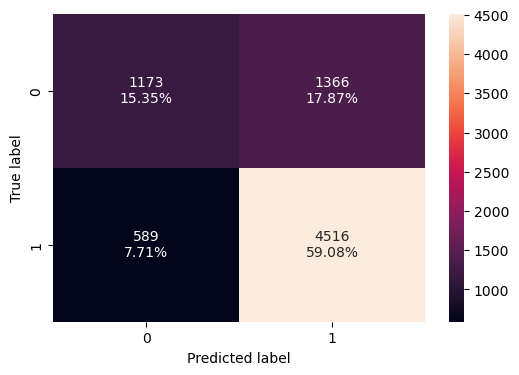

In [ ]:
# Calculating different metrics, using the xgb_tuned model looking at the train datasets and store the metrics in
# 'xgb_tuned_model_train_perf'
xgb_tuned_model_train_perf=model_performance_classification_sklearn(xgb_tuned,X_train,y_train)
print("Training performance:\n",xgb_tuned_model_train_perf)
#Calculating different metrics, using the xgb_tuned model looking at the test datasets and store the metrics in
# 'xgb_tuned_model_train_perf'
xgb_tuned_model_test_perf=model_performance_classification_sklearn(xgb_tuned,X_test,y_test)
print("Testing performance:\n",xgb_tuned_model_test_perf)

#Create confusion matrix based on the tuned XGBoosting model.
confusion_matrix_sklearn(xgb_tuned,X_test,y_test)

In this tuned model of XGBoost model, we notice that the cases where an individual was predicted to be certified has slightly increased roughly 2.05%. We also see that the cases where we correctly predicted that a case would be denied has increased roughly 0.78%. However, we also notice that our false positives (cases where we predicted that someone would be certified but were not) has increased by 0.79%. We also notice that the false negative cases has decreased by 2.05%. 

## Model Performance Comparison and Conclusions

In [ ]:
# We look at the metrics of the models based on the training dataset.  
models_train_comp_df = pd.concat(
    [
    rf_estimator_model_train_perf.T,rf_tuned_model_train_perf.T,
     bagging_classifier_model_train_perf.T,
     bagging_estimator_tuned_model_train_perf.T,
     ab_classifier_model_train_perf.T,
     abc_tuned_model_train_perf.T,gb_classifier_model_train_perf.T,
     gbc_tuned_model_train_perf.T,xgb_classifier_model_train_perf.T,
    xgb_tuned_model_train_perf.T],
    axis=1,
)
models_train_comp_df.columns = [
    "Random Forest Estimator",
    "Random Forest Tuned",
    "Bagging Classifier",
    "Bagging Estimator Tuned",
    "Adaboost Classifier",
    "Adabosst Classifier Tuned",
    "Gradient Boost Classifier",
    "Gradient Boost Classifier Tuned",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned"
    ]

# We then look at the metrics of the models based on the testing dataset.  

models_test_comp_df = pd.concat(
    [
    rf_estimator_model_test_perf.T,rf_tuned_model_test_perf.T,
     bagging_classifier_model_test_perf.T,bagging_estimator_tuned_model_test_perf.T,ab_classifier_model_test_perf.T,
     abc_tuned_model_test_perf.T,gb_classifier_model_test_perf.T,gbc_tuned_model_test_perf.T,xgb_classifier_model_test_perf.T,
    xgb_tuned_model_test_perf.T],
    axis=1,
)
models_test_comp_df.columns = [
    "Random Forest Estimator",
    "Random Forest Tuned",
    "Bagging Classifier",
    "Bagging Estimator Tuned",
    "Adaboost Classifier",
    "Adabosst Classifier Tuned",
    "Gradient Boost Classifier",
    "Gradient Boost Classifier Tuned",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned"]


In [ ]:
# We print the metrics of the models after running the models on the training dataset.
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Random Forest Estimator,Random Forest Tuned,Bagging Classifier,Bagging Estimator Tuned,Adaboost Classifier,Adabosst Classifier Tuned,Gradient Boost Classifier,Gradient Boost Classifier Tuned,XGBoost Classifier,XGBoost Classifier Tuned
Accuracy,1.0,0.730096,0.984694,0.992711,0.738338,0.752859,0.757401,0.755214,0.847107,0.766596
Recall,1.0,0.998069,0.985478,0.999328,0.890624,0.893394,0.893226,0.891799,0.937967,0.897003
Precision,1.0,0.712787,0.991554,0.989856,0.759267,0.772295,0.776942,0.775418,0.848959,0.784466
F1,1.0,0.831643,0.988507,0.994570,0.819716,0.828442,0.831036,0.829546,0.891246,0.836969


In [ ]:
# We print the metrics of the models after running the models on the testing dataset.
print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


,Random Forest Estimator,Random Forest Tuned,Bagging Classifier,Bagging Estimator Tuned,Adaboost Classifier,Adabosst Classifier Tuned,Gradient Boost Classifier,Gradient Boost Classifier Tuned,XGBoost Classifier,XGBoost Classifier Tuned
Accuracy,0.726714,0.698195,0.697410,0.728022,0.733647,0.741104,0.744375,0.744636,0.732470,0.744244
Recall,0.840940,0.975906,0.769246,0.885994,0.885994,0.887561,0.885798,0.886190,0.860333,0.884623
Precision,0.770736,0.695227,0.775780,0.751329,0.756734,0.763309,0.767351,0.767430,0.767296,0.767766
F1,0.804309,0.811996,0.772499,0.813124,0.816279,0.820759,0.822331,0.822545,0.811155,0.822062


Now, when we initially look at these models and the metrics associated with them, all we see is numbers. However, the trick is knowing what we're looking for. We know that the greater the F1-score, there's a higher probability of certification and denial of visas correctly. We also need to keep in mind that we're looking for the smallest difference in of the training and test dataset metrics. On close analysis, we find with this data, the best model to use is the Gradient Boost Classifer Tuned model. 

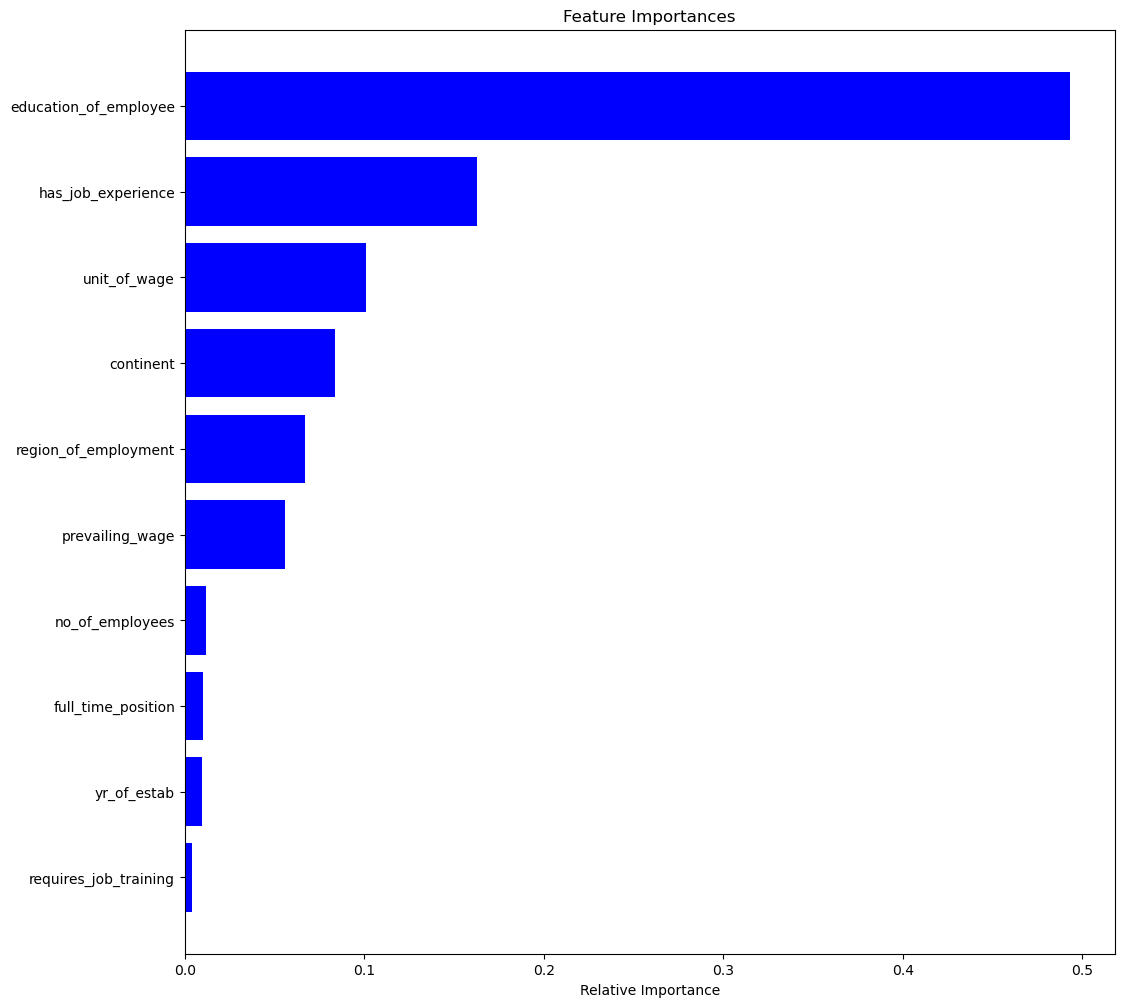

In [ ]:
# We make a variable named "feature_names" to contain the columns of the X_train dataset.
feature_names = X_train.columns

# We make the variable "importances" to see what the Gradient Boost Classifer model considers important of the 
#"feature_names" variable.
importances = gbc_tuned.feature_importances_

# We make a variable called "indices" to sort the values in "importances" according their values.
indices = np.argsort(importances)

# We establish the size of the upcoming graph.
plt.figure(figsize=(12,12))
# We set the title of the graph to be "Feature Importances"
plt.title('Feature Importances')
# We make a horizontal bar graph, looking at the 'indices' variable for range and order. We also set
# its color to be 'blue' and have 
plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
# We estlablish the y-axis values to be the names of the 'indices' value in order of significance.
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
# We label the x-axis as 'Relative Importance'
plt.xlabel('Relative Importance')
# We show the graph with no coding messages.
plt.show()

## Actionable Insights and Recommendations

- Based on our final chart, we see that education of the possilbe employee contributes significantly on whether they are certified for a visa or not. As they they increase in educational background, they are less likely to be denied. 
- The next big factor that influences their status on being certified is whether they have revelant job experience. If they do, they have a better probability (at least greater than 50%) of being certified to work in the United States of America.
- The unit of wage also contributes but we have to take this with a grain of salt. Someone with a doctorate degree will probably not take a job that pays hourly or weekly. However, we can see that if the wage rate is low, then there's a lower chance of the possible candidate being certified by that factor alone. 
- Regarding continent of orgin, it's a bit more difficult to decipher. However, in looking at our earlier graph, we can see that if an individual comes from Europe, they have more than 70% chance of being certified.
- Region of Employment is shown to be significant variable, though this graph doesn't display how it comes into play. Thankfully, our earlier graph informs us that those who want to reside in the Midwest region has a higher rate of certification.
- When it comes to prevailing wage, we see that it's significant, though its more difficult to say at what prevailing wage a person is more likely to be certified than not. Such analysis would could be found using Chi Squared analysis. 